<h1><center><font size="15">APRENDIZAJE AUTOMÁTICO (ISI-306)</font></center></h1>

<img src="Logo_1.jpg" width=800 height=600 />

<h1><center><font size="5">EXAMEN DE LABORATORIO 1</font></center></h1>

# CASO 3 - RENTA Y VENTA

#### ING: K. MARLON SOZA MAMANI

Importación de librerías:

In [2]:
# Importamos las librerias de OpenCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Tenga en cuenta:

Tres estudiantes de posgrado extranjeros buscan un lugar donde vivir mientras realizan sus estudios en el pais de Brasil. Todos forman parte de un intercambio universitario pagado (a excepción del alojamiento) y desean comprar un inmueble donde quedarse mientras terminan su programa.

- El primer estudiante ha sido asignado a una universidad de Río de Janeiro. Así mismo busca comprar un apartamento pequeño de alrededor de 60 metros cuadrados.


- El segundo estudiante tiene la opción de seleccionar la universidad de estudio, por lo cual busca comprar un apartamento en una ciudad de la región sur. Así mismo, planea viajar con su familia por lo cual busca un tamaño de 105 metros cuadrados.


- El tercer estudiante busca establecerse inmediatamente después de haber llegado a la ciudad, por lo cual busca más bien comprar un casa de alrededor 125 metros cuadrados. Se le ha asignado la cuidad de Santa Catarina

¿Cuál sería el precio recomendando para cada caso?


Utilice el datasheet de la siguiente pagina:

https://www.kaggle.com/datasets/ashishkumarjayswal/brasil-real-estate


## Tercer estudiante 

In [6]:
# --- Inserte código aqui
# --- Inserte código aqui
data = pd.read_csv('brasil.csv')


house3_data = data[(data["property_type"] == "house") & (data["state"] == "Santa Catarina")]
print(house3_data)


      Unnamed: 0 property_type           state region        lat        lon  \
6754        6755         house  Santa Catarina  South -27.064003 -48.699066   
6758        6759         house  Santa Catarina  South -26.985996 -48.636383   
6777        6778         house  Santa Catarina  South -26.803980 -48.648914   
6778        6779         house  Santa Catarina  South -27.643709 -48.676495   
6785        6786         house  Santa Catarina  South -29.181389 -49.629910   
...          ...           ...             ...    ...        ...        ...   
9733        9734         house  Santa Catarina  South -27.445972 -48.403809   
9735        9736         house  Santa Catarina  South -26.914858 -48.681507   
9737        9738         house  Santa Catarina  South -26.803980 -48.648914   
9742        9743         house  Santa Catarina  South -26.754795 -48.729183   
9744        9745         house  Santa Catarina  South -27.454047 -48.411582   

      area_m2  price_brl  
6754    200.0  459138.71

In [7]:

house3_data=house3_data.dropna()

In [13]:
# --- Obtener datos de las columnas (solo valores)
X = house3_data.values[:,6]
Y = house3_data.values[:,7]/1000
print(Y)

#print("Número de observaciones: "+str(len(Y)))

[459.13871 383.64621999999997 299.43828 588.89533 388.69419 292.78263
 848.40853 383.64621999999997 948.2212900000001 686.52482 274.4851
 648.78297 464.41384999999997 499.06383 548.97021 628.82041
 393.74215000000004 535.0855 454.31788 329.38213 479.10127 578.91403
 638.80171 597.87847 648.78297 1197.75322 264.50381 1097.9404299999999
 339.36339000000004 264.50381 272.59073 399.25107 269.49446 360.20829
 1147.84681 514.89361 648.78297 284.46637 519.02639 555.2774300000001
 888.33361 389.26977 748.59573 379.28851000000003 401.85918 453.30831
 447.16116999999997 555.2774300000001 509.04509 848.40853
 393.74215000000004 948.2212900000001 349.34466 588.89533 618.83915
 548.97021 748.59573 349.34466 753.58638 319.40084 349.34466
 383.64621999999997 548.97021 429.07802000000004 1367.43492 280.35908
 748.59573 798.50215 695.6111800000001 988.1464 675.62262 369.30722
 598.87659 359.32595000000003 958.2025500000001 269.49446 1267.62216
 249.5319 504.79764 389.26977 648.78297 269.49446 379.28851

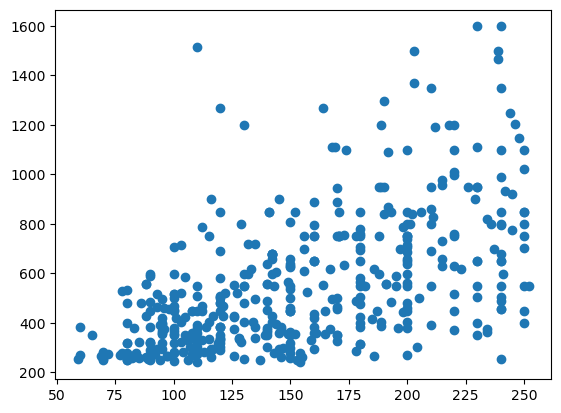

In [14]:
## Grafica con X sin empezar de cero
plt.scatter(X , Y)
plt.show()

In [39]:
w0 = 0 #Interceptor
w1 = 0 #Pendiente

n = 0.000000001 #Tamaño de paso
epochs = 99000 #Numero de Iterraciones
N = float(len(X)) #Numero de elementos en X

Error = [0]*epochs
T = np.arange(1, epochs+1)

In [40]:
#gradiente descendiente
for i in range(epochs):
    Y_pred = w0 + w1*X #Modelo predecido
    Error[i] = sum((Y-Y_pred)**2)
    D_w0 = (-2)*sum(Y-Y_pred)
    D_w1 = (-2)*sum((Y-Y_pred)*X)
    w0 = w0 - n*D_w0
    w1 = w1 - n*D_w1

In [41]:
print(w0,w1)

0.8044160513349825 3.5535851910347613


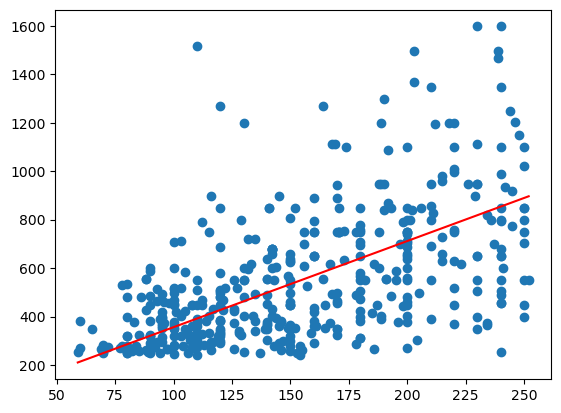

<Figure size 3500x1500 with 0 Axes>

In [42]:
Y_pred = w0 + w1 * X  # Reemplazamos Xnew por X

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')
#plt.plot(X, Y_pred, color='red')
plt.figure(figsize=(35, 15))
plt.show()


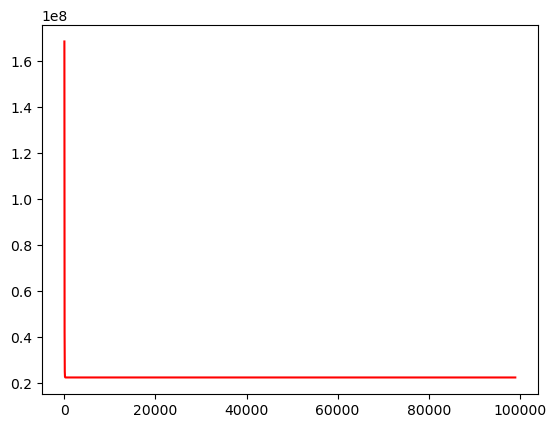

22496631.78342863


In [43]:
plt.plot(T, Error, '-r')
plt.show()
Min_E = min(Error)
print(Min_E)

In [ ]:
22498437.18309479


## Prediccion del precio

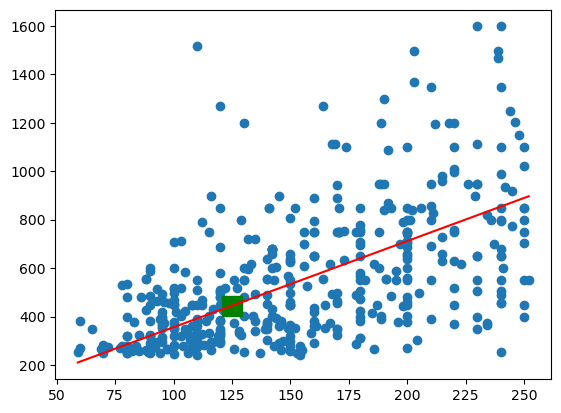

445.0025649306802


In [48]:
X_point = 125
Y_point = w0 + w1*X_point

plt.scatter(X, Y)
plt.plot(X_point, Y_point, 'gs',markersize = 15)
plt.plot([min(X), max(X)],[min(Y_pred),max(Y_pred)],color='red')
plt.show()

print(Y_point)

In [49]:
RES=Y_point*1000
print(RES)

445002.5649306802


# RESULTADO 445002.5649306802

In [27]:
matriz = np.array(data)
columna_deseada = matriz[:, 1]
valores_unicos = np.unique(columna_deseada)
print("Valores únicos en la primera columna:", valores_unicos)

Valores únicos en la primera columna: ['apartment' 'house']
